<a href="https://colab.research.google.com/github/eju1377/imdb-top-250-analysis/blob/main/IMDb_Top_250_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of Video Game Sales

Eli Underwood



## About the Data
This dataset comes from Kaggle user [mohamedasak](https://www.kaggle.com/datasets/mohamedasak/imdb-top-250-movies) and contains data about the top movies on IMDb.

Video Game Sales Dataset contains 11 columns, which are:

1. Rank - IMDb rank (1 to 250)
2. Title - Movie title

3. Year - Release year

4. Rating - IMDb rating (out of 10)

5. Duration - Movie runtime (e.g., “2h 22m”)
6. Genres - Movie genres (e.g., Drama, Action, Crime)
7. Certificate - Age rating or viewing restriction (e.g., PG-13, R)
8. Description - Short movie summary or plot
9. IMDb URL - Direct link to the movie’s IMDb page
10. Image URL - Poster or cover image link

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('imdb_top_movies.csv')

In [108]:
df.head()

,Rank,Title,Year,Rating,Duration,Certificate,Genres,Description,Image URL,Movie URL
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama,A banker convicted of uxoricide forms a friend...,https://m.media-amazon.com/images/M/MV5BMDAyY2...,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama",The aging patriarch of an organized crime dyna...,https://m.media-amazon.com/images/M/MV5BNGEwYj...,https://www.imdb.com/title/tt0068646/
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama",When a menace known as the Joker wreaks havoc ...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://www.imdb.com/title/tt0468569/
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama",The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMDIxMz...,https://www.imdb.com/title/tt0071562/
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama",The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BYjE4Nz...,https://www.imdb.com/title/tt0050083/


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         250 non-null    int64  
 1   Title        250 non-null    object 
 2   Year         250 non-null    int64  
 3   Rating       250 non-null    float64
 4   Duration     250 non-null    object 
 5   Certificate  245 non-null    object 
 6   Genres       250 non-null    object 
 7   Description  250 non-null    object 
 8   Image URL    250 non-null    object 
 9   Movie URL    250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [110]:
df.describe()

,Rank,Year,Rating
count,250.000000,250.000000,250.000000
mean,125.500000,1988.732000,8.311200
std,72.312977,25.556068,0.230144
min,1.000000,1921.000000,8.000000
25%,63.250000,1973.000000,8.100000
50%,125.500000,1995.500000,8.200000
75%,187.750000,2009.000000,8.400000
max,250.000000,2025.000000,9.300000


## Cleaning

In [111]:
# Check for empty cells in the DataFrame
print(np.where(pd.isnull(df)))
# 5 empty cells

# Check for duplicates of PlayerID in DataFrame
print('\n', any(df.duplicated()))
# No duplicates

# There doesn't seem to be any outliers or standarization issues

(array([ 69,  79,  80, 140, 219]), array([5, 5, 5, 5, 5]))

 False


In [112]:
df[df.isnull().any(axis=1)]
# Ignore null values because they are not important to our analysis

,Rank,Title,Year,Rating,Duration,Certificate,Genres,Description,Image URL,Movie URL
69,70,12th Fail,2023,8.7,2h 27m,NaN,"Biography, Drama",The real-life story of IPS Officer Manoj Kumar...,https://m.media-amazon.com/images/M/MV5BNTE3OT...,https://www.imdb.com/title/tt23849204/
79,80,Das Boot,1981,8.4,2h 29m,NaN,"Drama, War",A German U-boat stalks the frigid waters of th...,https://m.media-amazon.com/images/M/MV5BNGU0MW...,https://www.imdb.com/title/tt0082096/
80,81,Your Name.,2016,8.4,1h 46m,NaN,"Animation, Drama, Fantasy","Two teenagers share a profound, magical connec...",https://m.media-amazon.com/images/M/MV5BMjI1OD...,https://www.imdb.com/title/tt5311514/
140,141,The Chaos Class Failed the Class,1975,8.6,1h 35m,NaN,Comedy,A young and beautiful female teacher starts wo...,https://m.media-amazon.com/images/M/MV5BZmY3Mj...,https://www.imdb.com/title/tt0252488/
219,220,Maharaja,2024,8.3,2h 21m,NaN,"Action, Crime, Drama",A barber seeks vengeance after his home is bur...,https://m.media-amazon.com/images/M/MV5BOTFlMT...,https://www.imdb.com/title/tt26548265/


## Data Manipulation
The following manipulations are based on the following questions:


*   Which genres tend to have the highest average IMDb rating?
* Are older movies more likely to appear in the top 250 than newer ones?
* Which certificate category has the highest-rated films?

### Which genres tend to have the highest average IMDb rating?

In [113]:
# Create separate columns for Genres
df[['Genre1', 'Genre2', 'Genre3']] = df['Genres'].str.split(' ', expand=True)
df.head()

,Rank,Title,Year,Rating,Duration,Certificate,Genres,Description,Image URL,Movie URL,Genre1,Genre2,Genre3
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama,A banker convicted of uxoricide forms a friend...,https://m.media-amazon.com/images/M/MV5BMDAyY2...,https://www.imdb.com/title/tt0111161/,Drama,None,None
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama",The aging patriarch of an organized crime dyna...,https://m.media-amazon.com/images/M/MV5BNGEwYj...,https://www.imdb.com/title/tt0068646/,"Crime,",Drama,None
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama",When a menace known as the Joker wreaks havoc ...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://www.imdb.com/title/tt0468569/,"Action,","Crime,",Drama
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama",The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMDIxMz...,https://www.imdb.com/title/tt0071562/,"Crime,",Drama,None
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama",The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BYjE4Nz...,https://www.imdb.com/title/tt0050083/,"Crime,",Drama,None


In [114]:
# Remove commas from Genre 1, 2, 3
df['Genre1'] = df['Genre1'].str.replace(',', '')
df['Genre2'] = df['Genre2'].str.replace(',', '')
df['Genre3'] = df['Genre3'].str.replace(',', '')

df[['Genre1', 'Genre2', 'Genre3']].head()

,Genre1,Genre2,Genre3
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Crime,Drama,None
4,Crime,Drama,None


In [115]:
# Create DataFrame with average IMDb rating for each genres
genre1_rating = df[['Rating', 'Genre1']].groupby('Genre1').mean().sort_values(by='Rating', ascending=False)
genre2_rating = df[['Rating', 'Genre2']].groupby('Genre2').mean().sort_values(by='Rating', ascending=False)
genre3_rating = df[['Rating', 'Genre3']].groupby('Genre3').mean().sort_values(by='Rating', ascending=False)

In [116]:
# Combine all 3 genre rating DataFrames
genres_rating = pd.concat([genre1_rating, genre2_rating, genre3_rating], axis=1)

# Rename columns
genres_rating = genres_rating.set_axis(['AvgRating1', 'AvgRating2', 'AvgRating3'], axis=1)

genres_rating

,AvgRating1,AvgRating2,AvgRating3
Crime,8.400000,8.294118,8.200000
Adventure,8.340909,8.317647,8.257143
Action,8.321429,8.257143,NaN
Drama,8.302857,8.346154,8.308333
Animation,8.270370,NaN,NaN
Horror,8.266667,8.333333,8.500000
Comedy,8.264000,8.188889,8.180000
Biography,8.262500,8.233333,NaN
Mystery,8.200000,8.300000,8.286667
Sci-Fi,NaN,8.400000,8.340000


In [117]:
# Create new column for genres_rating with the average of all the datas
genres_rating['TotalAvgRating'] = genres_rating.iloc[:, 0:4].mean(axis=1)
# Sort by TotalAvgRating
genres_rating = genres_rating.sort_values(by='TotalAvgRating')

genres_rating.head()

,AvgRating1,AvgRating2,AvgRating3,TotalAvgRating
Sport,NaN,8.100000,8.125000,8.112500
Comedy,8.2640,8.188889,8.180000,8.210963
Biography,8.2625,8.233333,NaN,8.247917
Family,NaN,8.250000,8.257143,8.253571
Mystery,8.2000,8.300000,8.286667,8.262222


### Are older movies more likely to appear in the top 250 than newer ones?

In [118]:
# Add column with decade movie released
df['Decade'] = df['Year'] - (df['Year'] % 10)

df.head()

,Rank,Title,Year,Rating,Duration,Certificate,Genres,Description,Image URL,Movie URL,Genre1,Genre2,Genre3,Decade
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama,A banker convicted of uxoricide forms a friend...,https://m.media-amazon.com/images/M/MV5BMDAyY2...,https://www.imdb.com/title/tt0111161/,Drama,None,None,1990
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama",The aging patriarch of an organized crime dyna...,https://m.media-amazon.com/images/M/MV5BNGEwYj...,https://www.imdb.com/title/tt0068646/,Crime,Drama,None,1970
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama",When a menace known as the Joker wreaks havoc ...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://www.imdb.com/title/tt0468569/,Action,Crime,Drama,2000
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama",The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMDIxMz...,https://www.imdb.com/title/tt0071562/,Crime,Drama,None,1970
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama",The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BYjE4Nz...,https://www.imdb.com/title/tt0050083/,Crime,Drama,None,1950


### Which certificate category has the highest-rated films?

In [119]:
# Create DataFrame with certificate and average ratings
certificate_rating = df[['Rating', 'Certificate']].groupby('Certificate').mean().sort_values(by='Rating')
certificate_rating

,Rating
Certificate,
Passed,8.160000
Not Rated,8.229167
G,8.255556
Approved,8.277273
PG,8.291892
NC-17,8.300000
R,8.331068
PG-13,8.377143


## Visualizations

### Which genres tend to have the highest average IMDb rating?

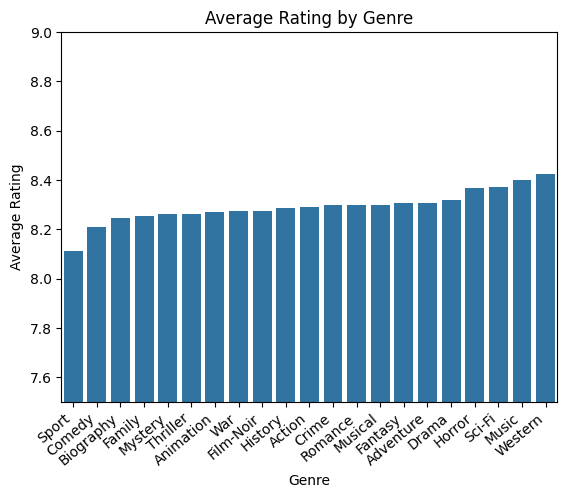

In [120]:
# Create a visulization of the question above
sns.barplot(x=genres_rating.index, y='TotalAvgRating',
            data= genres_rating)
plt.ylim(7.5, 9)
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=40, ha='right')

plt.show()

### Are older movies more likely to appear in the top 250 than newer ones?

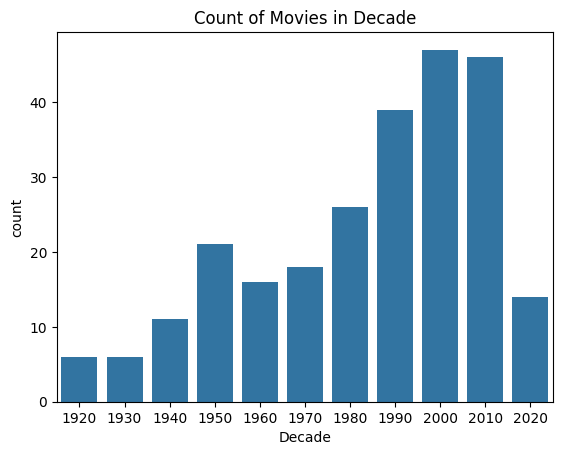

In [121]:
# Create a visulization of the question above
sns.countplot(x='Decade',
             data= df)
plt.title('Count of Movies in Decade')

plt.show()

### Which certificate category has the highest-rated films?

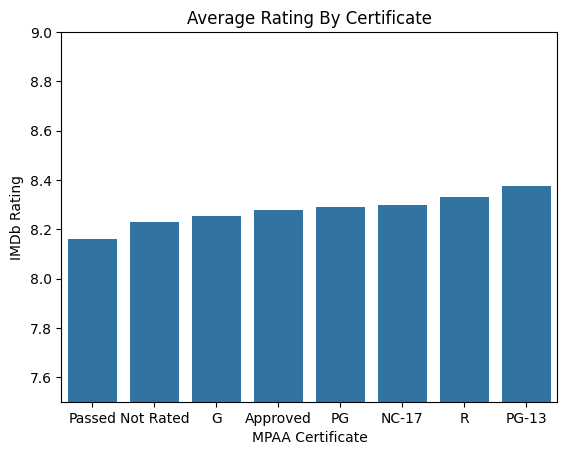

In [122]:
# Create chart visulizing the question above
sns.barplot(x='Certificate', y='Rating',
            data=certificate_rating)
plt.title('Average Rating By Certificate')
plt.xlabel('MPAA Certificate')
plt.ylabel('IMDb Rating')
plt.ylim(7.5, 9)

plt.show()

## Statistical Analysis

I am conducting descriptive statistics on the Rating and Year columns to explore what rating and year the top 250 movies are clustered around.

In [131]:
df[['Rating', 'Year']].describe()

,Rating,Year
count,250.000000,250.000000
mean,8.311200,1988.732000
std,0.230144,25.556068
min,8.000000,1921.000000
25%,8.100000,1973.000000
50%,8.200000,1995.500000
75%,8.400000,2009.000000
max,9.300000,2025.000000


According to the output of the code above, the top 250 movies are clustered around a mean rating of 8.3 and the year 1988. Most of the movies were released within 30 years. The movies in the top 250 are within 1.3 points on the IMBd rating scale.

## Conclusion